# Predicting House Prices using Linear Regression

**Jeremy_Stewart**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The goal here is to predict the sale prices of a house by considering changes in other attributes and using the relationship between the independent and dependent variables.

[Back to top](#Index)


## 1. Introduction

This project begins with some exploratory analysis to reach a better understanding of the source data. After the necessary libraries are imported, the housing data is read in from a csv and then analyzed to determine the underlying distribution. Data is further explored through visualizations to uncover the relationships between variables that are deemed critical to optimizing the sale price prediction model. Missing data is also removed to further optimize the model. After determining which independent variables correlate best with the sale price, multiple linear regression is performed to predict the prices and then tested for accuracy.

[Back to top](#Index)

## 2. The Data

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
data = pd.read_csv('houseSmallData/houseSmallData.csv')
train = data.iloc[0:100,:]
train.shape

(100, 82)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  OverallQual

In [4]:
data.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,100.000000,100.000000,86.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.00000,100.000000
mean,49.500000,50.500000,52.000000,71.406977,10115.870000,5.980000,5.50000,1971.410000,1983.920000,121.640000,...,46.900000,24.130000,7.270000,10.160000,0.0,NaN,46.300000,6.330000,2007.90000,173820.660000
std,29.011492,29.011492,42.545282,21.093840,5130.541763,1.530696,0.97959,29.373284,20.967353,213.553982,...,59.743306,60.211019,51.518724,46.908835,0.0,NaN,153.692958,3.048613,1.35959,72236.552886
min,0.000000,1.000000,20.000000,21.000000,1596.000000,3.000000,2.00000,1910.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.00000,40000.000000
25%,24.750000,25.750000,20.000000,60.000000,7643.250000,5.000000,5.00000,1954.750000,1964.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.750000,2007.00000,129362.500000
50%,49.500000,50.500000,45.000000,70.000000,9595.500000,6.000000,5.00000,1970.000000,1994.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.00000,153750.000000
75%,74.250000,75.250000,60.000000,84.000000,11243.250000,7.000000,6.00000,2000.250000,2003.250000,188.500000,...,72.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.00000,207750.000000
max,99.000000,100.000000,190.000000,122.000000,50271.000000,10.000000,8.00000,2009.000000,2009.000000,1115.000000,...,258.000000,272.000000,407.000000,291.000000,0.0,NaN,700.000000,12.000000,2010.00000,438780.000000


In [5]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
salePrice = train['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

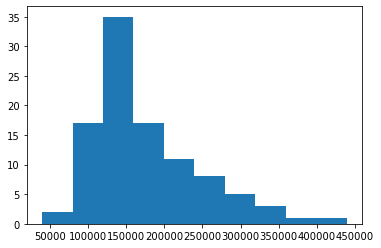

In [7]:
plt.hist(salePrice)

Because the prices are skewed, the data will need to be scaled. The skew() function will return an unbiased skew.

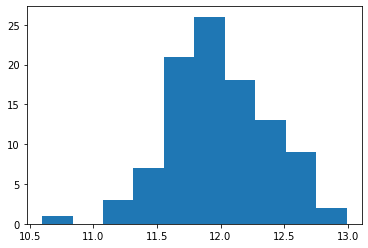

In [8]:
plt.hist(np.log(salePrice))
np.log(salePrice).skew()
target = np.log(salePrice)

In [9]:
np.log(salePrice).skew()

-0.09632240207755555

[Back to top](#Index)

### 2.2 Data Exploration

In [10]:
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(100, 40)

In [11]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea'],
      dtype='object')

After the sale price, the top 9 correlating independent variables are listed.

In [12]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea
0,7,1710,548,2,2003,856,2003.0,2,196.0
1,6,1262,460,2,1976,1262,1976.0,2,0.0
2,7,1786,608,2,2001,920,2001.0,2,162.0
3,7,1717,642,3,1915,756,1998.0,1,0.0
4,8,2198,836,3,2000,1145,2000.0,2,350.0
...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0
96,7,1588,472,2,1999,1588,1999.0,2,183.0
97,4,960,432,1,1965,960,1965.0,1,48.0
98,5,835,366,1,1920,458,1920.0,1,0.0


#### Data Description
* OverallQual - Rates the overall material and finish of the house
* GrLivArea - Above grade (ground) living area square feet
* GarageArea - Size of garage in square feet
* GarageCars - Size of garage in car capacity
* YearBuilt - Original construction date
* TotalBsmtSF - Total square feet of basement area
* GarageYrBlt - Year garage was built
* FullBath - Full bathrooms above grade
* MasVnrArea - Masonry veneer area in square feet

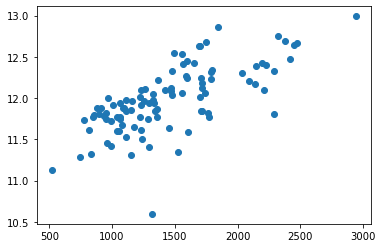

In [13]:
plt.scatter(train['GrLivArea'],y=target)

Ground level square footage has one of the strongest correlations.

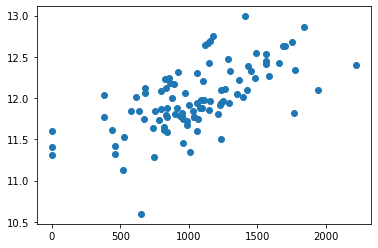

In [14]:
plt.scatter(train['TotalBsmtSF'],y=target)

Generally speaking, the more basement square footage as house has the higher the sale price will be.

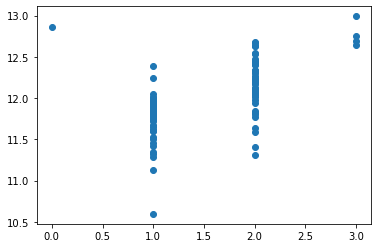

In [15]:
plt.scatter(train['FullBath'],y=target)

Although full baths are measured discretely, a positive correlation is still evident within the graph.

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


In [16]:
nulls = train.isnull().sum().sort_values(ascending=False)
nulls

PoolQC         100
Alley           94
MiscFeature     91
Fence           77
FireplaceQu     54
              ... 
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 82, dtype: int64

In [17]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

(100, 39)

[Back to top](#Index)

### 2.4 Correlation

In [18]:
numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:7].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF'],
      dtype='object')

In [19]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.589361
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
LotFrontage      0.277853
BsmtFinSF1       0.266713
MoSold           0.256863
BedroomAbvGr     0.233426
BsmtFullBath     0.155689
ScreenPorch      0.035930
3SsnPorch       -0.019391
BsmtHalfBath    -0.055100
MSSubClass      -0.066819
MiscVal         -0.134707
BsmtFinSF2      -0.138126
LowQualFinSF    -0.150027
Id              -0.162735
Unnamed: 0      -0.162735
OverallCond     -0.170443
EnclosedPorch   -0.233483
KitchenAbvGr    -0.235659
YrSold          -0.262683
PoolArea    

In [20]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF
0,7,1710,548,2,2003,856
1,6,1262,460,2,1976,1262
2,7,1786,608,2,2001,920
3,7,1717,642,3,1915,756
4,8,2198,836,3,2000,1145
...,...,...,...,...,...,...
95,6,1470,420,2,1993,680
96,7,1588,472,2,1999,1588
97,4,960,432,1,1965,960
98,5,835,366,1,1920,458



[Back to top](#Index)

## 3. Project Description

To achieve a higher level of accuracy then the model used in the example, a larger number of independent variables with high correlations were used in this project's model.


[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is a machine learning algorithm that is used to predict values within a continuous range (i.e., stocks’ price and height) rather than classifying them into categories (i.e., male or female).

The values that you want to predict are the dependent variable(s). The predictions can be made using one or more independent variables.

The equation for multiple linear regression is:

$$Y=X_1\beta_1+X_2\beta_2+X_3\beta_3 ...$$

where $x_1,x_2,...,x_n$ represent the data points of all the independent variables used to make the prediction, $m_1,m_2,...,m_n$ are the weights, and b is the bias.

Mini-Lesson 7.1

In [21]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.8489694682378784


### 85% of prices are explained by this set of variables.

(array([ 2.,  5.,  7., 28., 27., 15., 11.,  2.,  1.,  2.]),
 array([-74467.30462331, -57521.04396945, -40574.78331559, -23628.52266173,
         -6682.26200787,  10263.99864599,  27210.25929985,  44156.51995371,
         61102.78060757,  78049.04126143,  94995.30191529]),
 <BarContainer object of 10 artists>)

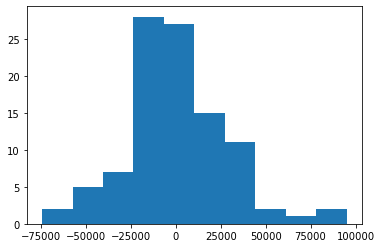

In [22]:
plt.hist(Y - predictions)

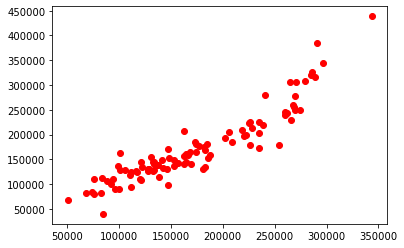

In [23]:
plt.scatter(predictions, Y, color = 'r')

[Back to top](#Index)

### 3.2 Analysis 

In [24]:
# establishing the second group of variables qty:3
second_set = corr['SalePrice'].sort_values(ascending=False)[['SalePrice','FullBath','MasVnrArea','1stFlrSF']].index
B = data[second_set]
B = B.drop(['SalePrice'], axis = 1)

# establishing the third set of independent variables qty:4
thd_set = corr['SalePrice'].sort_values(ascending=False)[0:5].index
C = data[thd_set]
C = C.drop(['SalePrice'], axis = 1)

B

,FullBath,MasVnrArea,1stFlrSF
0,2,196.0,856
1,2,0.0,1262
2,2,162.0,920
3,1,0.0,961
4,2,350.0,1145
...,...,...,...
95,2,68.0,680
96,2,183.0,1588
97,1,48.0,960
98,1,0.0,835


In [25]:
C

,OverallQual,GrLivArea,GarageArea,GarageCars
0,7,1710,548,2
1,6,1262,460,2
2,7,1786,608,2
3,7,1717,642,3
4,8,2198,836,3
...,...,...,...,...
95,6,1470,420,2
96,7,1588,472,2
97,4,960,432,1
98,5,835,366,1


[Back to top](#Index)

### 3.3 Results

In [26]:
# the model takes in the second set of variables as input
snd_model = lr.fit(B,Y)
predictions = snd_model.predict(B)
print(f"R^2 is: {snd_model.score(B,Y)}")

R^2 is: 0.5431129246736685


In [27]:
# the model takes in the third set of variables as input
thd_model = lr.fit(C,Y)
predictions = thd_model.predict(C)
print(f"R^2 is: {thd_model.score(C,Y)}")

R^2 is: 0.7916699059969976


The second and third models tested contained smaller sets of variables, quantities of 3 and 4 respectively. I wanted to see if it was possible to return better results from the models with fewer independent variables. This was not the case as the latter models under-performed significantly.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

In [28]:
test = pd.read_csv('jtest/jtest.csv')
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF
0,6,1610,480,2,1977,1610
1,6,1732,476,2,1985,741
2,5,1535,410,2,1979,0
3,7,1226,740,3,2009,1226
4,7,1818,240,1,1931,1040
...,...,...,...,...,...,...
95,6,1456,440,2,1976,855
96,7,1726,786,3,2007,1726
97,8,3112,795,2,1918,1360
98,6,2229,0,0,1912,755


In [33]:
predictions = model.predict(C)
print(f"R^2 is: {model.score(C,Y)}")

R^2 is: -0.9680394844773688


[Back to top](#Index)

## Conclusion

The first model containing the top 6 correlating variables performed the best when explaining sales prices. The number of variables within the model appears to be a key factor in making predictions. Selecting the top ranked correlators also had a major effect on the model's performance.


[Back to top](#Index
)